### Bitte lade dir die Daten aus GDrive runter und platziere sie im entsprechenden Verzeichnis
https://drive.google.com/drive/folders/1lWrhk-i7g3Hbl5DWO7DFm6LtL7U_eJBH?usp=sharing

# Absatzprognose für einen Supermarkt
Stell dir vor, du bist ein Data Scientist, der für Favorita, eine Supermarktkette in Ecuador, arbeitet. Du hast Zugang zu einem umfangreichen Datensatz, der Verkaufsinformationen, Angaben zu Geschäften und Produkten sowie zusätzliche wirtschaftliche Indikatoren aus den letzten Jahren enthält. Das Management möchte diese Daten nutzen, um fundierte Entscheidungen treffen zu können. Sie sind besonders daran interessiert, herauszufinden, welche Produktfamilien den höchsten Umsatz erzielen, ob in den Daten Anomalien vorhanden sind und insbesondere, ob die Verkäufe für die nächsten 15 Tage präzise vorhergesagt werden können.

Deine Aufgabe ist es, eine tiefgehende Analyse der bereitgestellten Datensätze durchzuführen. Du hast Zugang zu verschiedenen Dateien: 'train.csv' enthält Zeitreihendaten für verschiedene Merkmale wie Geschäftsnummer (store_nbr), Produktfamilie (family) und Informationen über Promotionen (onpromotion). 'test.csv' gibt dir die Möglichkeit, deine Vorhersagemodelle auf Aktualität zu prüfen. Ergänzende Dateien wie 'stores.csv', 'oil.csv' und 'holidays_events.csv' bieten zusätzliche Kontextinformationen, die bei deiner Analyse hilfreich sein könnten.

### Aufgaben

#### Aufgabe 1. Allgemeine Analyse
1. **Daten laden und inspizieren**: Lade den Datensatz und schau dir die ersten Zeilen an. Überprüfe auch, welche Datentypen die einzelnen Spalten haben.
2. **Zusammenfassende Statistik**: Erstelle eine Übersicht der wichtigsten statistischen Kennzahlen, um ein besseres Gefühl für die Daten zu bekommen. Beispiele könnten sein: 
    - Wie viele Produkte werden verkauft
    - Wie viel Umsatz wurde erwirtschaftet
    - Auswertung hinsichtlich verschiedener Dimensionen ( z. B. : Zeit, Store, Produkt)
    - usw. - Überlege dir weitere Kennzahlen die einen guten Einblick geben könnten
3. **Verkaufsanomalien**: Finde ungewöhnliche Spitzen oder Einbrüche im Verkauf und versuche, die Gründe dafür zu ermitteln.


**INFO: Das Datenset findest du im Ilias Ordner. Speichere es unter tsa02 ab. Beginne mit der Analyse von `train.csv` und ziehe bei Bedarf weitere Daten hinzu.**

### Ziele
1. Welches Produkt erzielt höchsten Umsatz
2. Anomalieerkennung
3. Absatzprognose für die nächsten 15 Tage

In [49]:
# Your Code here
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [50]:
train_data = pd.read_csv('../data/tsa02/train.csv')
test_data = pd.read_csv('../data/tsa02/test.csv')
stores_data = pd.read_csv('../data/tsa02/stores.csv')
oil_data = pd.read_csv('../data/tsa02/oil.csv')
holiday_data = pd.read_csv('../data/tsa02/holidays_events.csv')

In [51]:
train_data = train_data.merge(stores_data, on='store_nbr', how='left')
train_data = train_data.merge(oil_data, on='date', how='left')
train_data = train_data.merge(holiday_data, on='date', how='left')
train_data

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False


In [52]:
train_data.info(), train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type_x       object 
 9   cluster      int64  
 10  dcoilwtico   float64
 11  type_y       object 
 12  locale       object 
 13  locale_name  object 
 14  description  object 
 15  transferred  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 372.8+ MB


(None,
                  id     store_nbr         sales   onpromotion       cluster  \
 count  3.054348e+06  3.054348e+06  3.054348e+06  3.054348e+06  3.054348e+06   
 mean   1.504277e+06  2.750000e+01  3.590209e+02  2.617480e+00  8.481481e+00   
 std    8.662610e+05  1.558579e+01  1.107286e+03  1.225494e+01  4.649735e+00   
 min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00   
 25%    7.546768e+05  1.400000e+01  0.000000e+00  0.000000e+00  4.000000e+00   
 50%    1.507572e+06  2.750000e+01  1.100000e+01  0.000000e+00  8.500000e+00   
 75%    2.255120e+06  4.100000e+01  1.960110e+02  0.000000e+00  1.300000e+01   
 max    3.000887e+06  5.400000e+01  1.247170e+05  7.410000e+02  1.700000e+01   
 
          dcoilwtico  
 count  2.099196e+06  
 mean   6.801587e+01  
 std    2.569134e+01  
 min    2.619000e+01  
 25%    4.641000e+01  
 50%    5.343000e+01  
 75%    9.581000e+01  
 max    1.106200e+02  )

In [53]:
# Missing values
print(train_data.isnull().sum())
# Duplicates
print(train_data.duplicated().sum())

id                   0
date                 0
store_nbr            0
family               0
sales                0
onpromotion          0
city                 0
state                0
type_x               0
cluster              0
dcoilwtico      955152
type_y         2551824
locale         2551824
locale_name    2551824
description    2551824
transferred    2551824
dtype: int64
0


In [54]:
# # Sales per store
# store_sales = train_data.groupby('store_nbr').sum().sort_values('sales')
# fig = px.bar(store_sales, x=store_sales.index, y='sales', title='Sales per store')
# fig.show()

In [55]:
# # Sales per family
# family_sales = train_data.groupby('family').sum().sort_values('sales')
# fig = px.bar(family_sales, x=family_sales.index, y='sales', title='Sales per family')
# fig.update_layout(yaxis_type="log")
# fig.show()

In [56]:
# Does "onpromotion" affect sales?
correlation = train_data['onpromotion'].corr(train_data['sales'], method='pearson')

print(f"Correlation between promotions count and sales: {correlation:.2f}")

Correlation between promotions count and sales: 0.43


#### Aufgabe 2. Datenbereinigung und -vorverarbeitung
1. **Probleme und Ausreißer erkennen**: Finde Duplikate und Ausreißer im Datensatz und entscheide, wie diese behandelt werden sollen.
2. **Fehlende Daten finden**: Schau nach, ob im Datensatz Werte fehlen, und überlege dir, wie du damit umgehen willst.

In [57]:
# Select columns
columns = ["date" ,"store_nbr" ,"family" ,"sales" ,"onpromotion" ,"city" ,"state" ,"type_x" ,"cluster"]
train_data = train_data[columns]
train_data

,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...
3054343,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3054344,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3054345,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3054346,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [58]:
# Select stores
STORES = [2, 11, 44, 47]
train_data = train_data[train_data['store_nbr'].isin(STORES)]
train_data.store_nbr.unique()

array([11,  2, 44, 47], dtype=int64)

In [59]:
for store in STORES:
    data = train_data[train_data['store_nbr'] == store]
    sales = data.groupby('date')["sales"].sum().reset_index()
    fig = px.line(data, x=sales.date, y=sales.sales, title=f'Store {store} sales')
    fig.show()

In [71]:
# Outliers
import numpy as np


def zscore(series):
    return (series - series.mean()) / series.std()

datasets = []

for store in STORES:
    data = train_data[train_data['store_nbr'] == store]
    data = data.groupby('date').sum().reset_index()
    zsc = zscore(data.sales)
    # Empty line
    fig = go.Figure()
    data["sales"] = data["sales"].mask(zsc.abs() > 3, data["sales"].median())
    datasets.append(data)
    fig = px.line(x=sales.date, y=sales.sales)
    fig.show()


### Aufgabe 3. Umsatzanalyse
Top 5 Umsatzprodukte: Finde heraus, welche 5 Kategorien (family) am meisten verkauft werden. Führe ein Detailanalyse für 3 dieser Kategorien durch. D.h. Schau dir ihren zeitlichen verlauf an, untersuche mögliche Korrelationen zu anderen Kategorien. Verwende diese 3 Produkte auch bei den folgenden Aufgaben.

In [61]:
# family_sales = train_data.groupby('family').sum()
# fig = px.bar(family_sales, x=family_sales.index, y='sales', title='Sales per family')
# fig.update_layout(yaxis_type='log', xaxis={'categoryorder':'total descending'})
# fig.show()

### Aufgabe 4. Zeitreihenanalyse
Zeitreihen zerlegen: Unterteile die Zeitreihendaten in ihre Bestandteile: Trend, Saisonalität und Rauschen.
Stationarität überprüfen: Checke, ob die Zeitreihendaten stationär sind oder nicht.
Auto-Korrelation und partielle Auto-Korrelation: Erstelle diese Plots, um eventuelle Autokorrelationen in den Zeitreihendaten zu identifizieren.

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

for store in STORES:
    data = train_data[train_data['store_nbr'] == store]#
    total_sales = data.groupby('date')["sales"].sum().reset_index()
    result = seasonal_decompose(total_sales["sales"], model='additive', period=30)
    # result.plot()
    fig = make_subplots(rows=4, cols=1,
                        subplot_titles=("Observed", "Trend", "Seasonal", "Residual"))
    fig.add_trace(go.Scatter(x=total_sales.date, y=total_sales.sales, mode='lines', name='Sales'), row=1, col=1)
    fig.add_trace(go.Scatter(x=total_sales.date, y=result.trend, mode='lines', name='Trend'), row=2, col=1)
    fig.add_trace(go.Scatter(x=total_sales.date, y=result.seasonal, mode='lines', name='Seasonal'), row=3, col=1)
    fig.add_trace(go.Scatter(x=total_sales.date, y=result.resid, mode='lines', name='Residual'), row=4, col=1)
    fig.update_layout(title=f'Store {store} sales decomposition', height=600)
    fig.show()


In [63]:
for store in STORES:
    data = train_data[train_data['store_nbr'] == store]
    sales = data.groupby('date')["sales"].sum().reset_index()
    sales['month'] = pd.to_datetime(sales['date']).dt.month
    sales['year'] = pd.to_datetime(sales['date']).dt.year
    sales['year_month'] = pd.to_datetime(sales['date']).dt.to_period('M').astype(str)

    means = sales.groupby('year_month')['sales'].mean()
    var = sales.groupby('year_month')['sales'].var()
    fig = make_subplots(rows=1, cols=2)
    fig.add_trace(go.Scatter(x=means.index, y=means, mode='lines', name='Mean'), row=1, col=1)
    fig.add_trace(go.Scatter(x=var.index, y=var, mode='lines', name='Variance'), row=1, col=2)
    fig.update_layout(title=f'Store {store}: mean and variance of sales per month')
    fig.show()

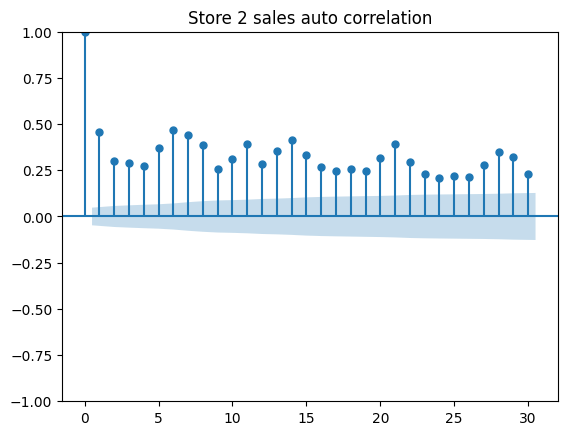

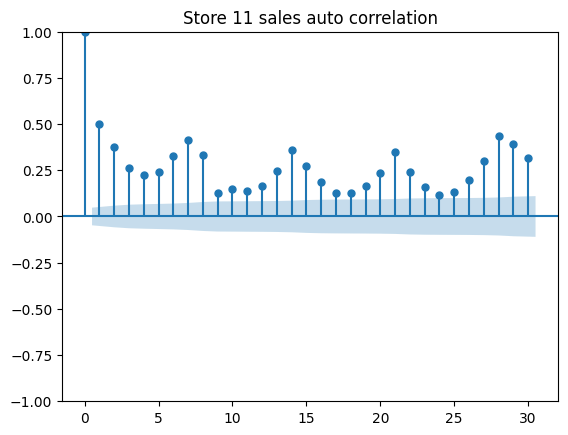

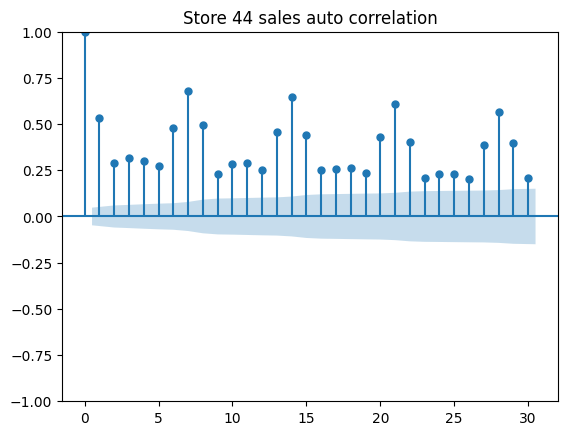

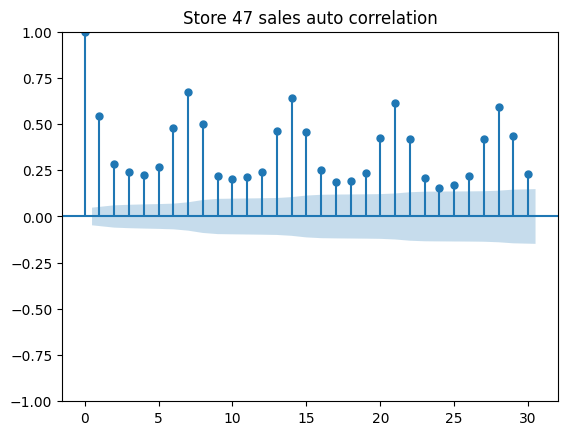

In [64]:
# Auto correlation
from statsmodels.graphics.tsaplots import plot_acf

for store in STORES:
    data = train_data[train_data['store_nbr'] == store]
    sales = data.groupby('date')["sales"].sum().reset_index()
    plot_acf(sales['sales'], lags=30, title=f'Store {store} sales auto correlation')

#### Aufgabe 5++ Offene Fragen:
Die folgenden Fragen könnten bei Steakholdern aufkommen. Findest du auf diese Fragen Antworten in den Daten? Stütze deine Erkenntnisse mit Visualisierungen

**Umsatztrends und Saisonalität:**

1. Wie entwickeln sich die Gesamtumsätze von Jahr zu Jahr?
2. Wie variieren die Umsätze nach Monat oder Saison? Gibt es spezifische Monate, in denen die Umsätze deutlich ansteigen oder abnehmen?
3. An welchem Wochentag sind die Umsätze am höchsten?

**Leistung von Produkten und Geschäften:**

4. Welche Produkte sind die Spitzenreiter in Bezug auf Verkaufsvolumen und Umsatz?
5. Gibt es Geschäfte, die konstant besser abschneiden als andere? Was könnte zu ihrem Erfolg beitragen?
6. Wie vergleichen sich die Umsatzleistungen zwischen verschiedenen Geschäftsstandorten oder Regionen?

**Auswirkungen von Promotionen:**

7. Wie beeinflussen Promotionen die Umsätze? Steigern sie die Verkaufsvolumen signifikant?
8. Welche Arten von Promotionen (z.B. Rabatte, Kaufe eins, bekomme eins gratis) haben den größten Einfluss auf die Umsätze?
9. Profitieren alle Geschäfte gleichermaßen von Promotionen, oder gibt es einige, die mehr profitieren als andere?

**Einfluss externer Faktoren:**

10. Wie beeinflussen externe Faktoren wie Feiertage oder lokale Ereignisse die Umsätze?
11. Gibt es bemerkenswerte Veränderungen in den Umsatzmustern während großer Sportereignisse oder bei schlechtem Wetter?

**Kundenverhalten:**

12. Was lässt sich aus den Verkaufsdaten über das Kaufverhalten der Kunden ableiten?
13. Gibt es bestimmte Zeiten im Jahr, in denen die Käufe der Kunden signifikant zu- oder abnehmen?
14. Wie könnten wirtschaftliche Indikatoren die Kaufmuster beeinflussen?

**Lagerverwaltung:**

15.  Wie können wir die Lagerbestände basierend auf historischen Verkaufsdaten optimieren, um Kosten zu senken und den Umschlag zu erhöhen?
16.  Gibt es Muster von Produktretouren, die im Supply-Chain-Management adressiert werden müssen?

**Markterweiterung und strategische Planung:**

17. Angesichts der Verkaufsdaten, welche neuen Standorte sollten für Geschäftserweiterungen in Betracht gezogen werden?
18. Gibt es aufkommende Trends, die neue Produktlinien oder Änderungen in den Geschäftsmodellen vorschlagen?

**Technologische Verbesserungen:**

19. Welche Rolle kann Technologie spielen, um das Kundenverhalten und die Umsatztrends besser zu verstehen und vorherzusagen?
20. Wie können Datenanalysewerkzeuge verbessert werden, um tiefere Einblicke in die Verkaufsdaten zu bieten?

**Risikomanagement:**

21. Was sind die potenziellen Risiken in zukünftigen Umsatztrends und wie können diese gemildert werden?
22. Wie widerstandsfähig sind die Umsätze gegenüber wirtschaftlichen Abschwüngen oder Veränderungen in den Verbraucherpräferenzen?
